- ## 요약
    1. 시퀸스 모델
        - 표기법
        - RNN
            - 수식
            - 역전파
            - RNN 의 형태
                - 다대다 아키텍쳐
                    - 인코더, 디코더
            - 샘플링
            - 기울기 소실
            - GRU
                - 과정
                - 수식
            - LSTM
                - 게이트
                - 수식
            - BRNN
                - 수식
            - DeepRNN
            
    2. 단어 임베딩
        - Featurized representation
        - 학습 과정
        - 비슷한 관계의 예측
        - Embedding matrix 표현

    3. Word2Vec
        - Skip-gram
        - Negative sampling
        - GloVe
    4. Setiment Classification
    5. Bias Correction on Word embedding
        - 중립화
        - 평준화
        


- ## 시퀸스 모델
    - 소리,문장, 악보 같이 순차적인 정보 입력을 처리하는 모델
    - 문장 인식, 음악 생성, dna 분석, 기계번역, 동작인식 등의 다양한 분야가 있음


    - ### 표기법
        - 입력 $x$ 아 출력 $y$ 에 대해
            - 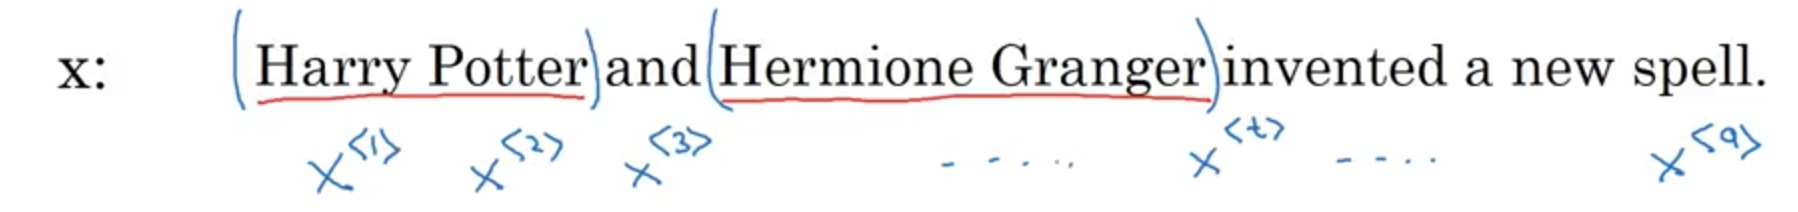
            - $x^{<n>}$ : 입력 $x$ 의 n 번째 인덱스 값임
            - $T_x=9$ : 인덱스의 카운트임
            - $y^{<n>}$ : n 번째 인덱스의 출력을 의미함 
            - i 번째 훈련 데이터의 t 번째 인덱스 표현시
                - $x^{(i)<t>}$ 
        - 단어장 표기
            - 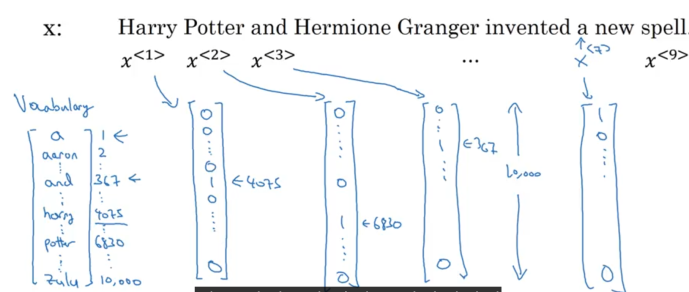
            - n개의 단어를 가진 단어장을 $n \times 1 $ 크기의 행렬로 표기함
            - 이후 입력 데이터 문장을 단어장에 대한 $(n \times 1)$ 크기의 원-핫 벡터의 형태로 출력한다
                - 만약 단어장에 없는 데이터일 경우 모름을 의미하는 UNK 토큰 번호를 부여한다

    
    - ### RNN
        - 시퀸스 입력을 데이터를 단어별로 입력으로 받고, 몇 계층의 은닉층과 단어 갯수와 동일한 출력층으로 나타내는것을 생각할수있음
            - 문제점
                - 입력과 출력의 길이는 다를수 있음
                - 서로 다른 위치에서 학습한 기능을 공유하지 않음
        - 위 문제떄문에 기본형태의 신경망 대신 RNN 사용함.
        - $x^{<n>}$ 단어를 처리할떄 이전 단어 $x^{<n-1>}$ 의 활성화 값 $a^{<n-1>}$ 을 입력값으로 사용하여 
        - $\hat{y}^{<n>}$ 을 구하고, 다음 값도 동일한 방법으로 연쇄적인 형태로 구함
        - 초기 입력에 대한 $a^{<0>}$ 일경우 일반적으로 영벡터 사용함
        - 이때 사용되는 가중치는 $x^{<n>}$ 에 사용하는 $w_{ax}$, $a^{<n-1>}$ 에 사용되는 $w_{aa}$ ,  $a^{<n>}$ 에 사용되는 $w_{ay}$ 가 있다
            - 수식으로 확인할것
            - 첫번쨰 레이어에 대한 RNN 처리 예시
                - $a^{\langle 0 \rangle} = \vec{0}$  
                - $a^{\langle 1 \rangle} = g(W_{aa} a^{\langle 0 \rangle} + W_{ax} x^{\langle 1 \rangle} + b_a)$  
                - $\hat{y}^{\langle 1 \rangle} = g(W_{ya} a^{\langle 1 \rangle} + b_y)$  
                - 사용되는 3개의 가중치와 레이어 주시
        - 수식
            - $a^{\langle t \rangle} = g(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$  
                - $W_{aa}$ 와 $W_{ax}$ 를 동시에 처리하는 다음과 같은 식으로 표기함
                - $a^{\langle t \rangle} = g(W_a \begin{bmatrix} a^{\langle t-1 \rangle}, x^{\langle t \rangle} \end{bmatrix} + b_a)$  

            - $\hat{y}^{\langle t \rangle} = g(W_{ya} a^{\langle t \rangle} + b_y)$  

        - 역전파
            - 손실함수는 Binary Cross-Entropy Loss 또는 MSE 사용함
                - $\mathcal{L}^{\langle t \rangle} (\hat{y}^{\langle t \rangle}, y^{\langle t \rangle}) = - y^{\langle t \rangle} \log \hat{y}^{\langle t \rangle} - (1 - y^{\langle t \rangle}) \log (1 - \hat{y}^{\langle t \rangle})$
                - 이진 크로스엔트로피 손실
            - 비용 함수 정의
                - 각 인덱스 별로 나온 비용 함수의 총합임
                - $\mathcal{L} (\hat{y}, y) = \sum\limits_{t=1}^{T} \mathcal{L}^{\langle t \rangle} (\hat{y}^{\langle t \rangle}, y^{\langle t \rangle})$


            - 각 인덱스 입력 별로 $w_{aa}, w_{ay}, w_{ax}$ 를 갱신해야함



        - 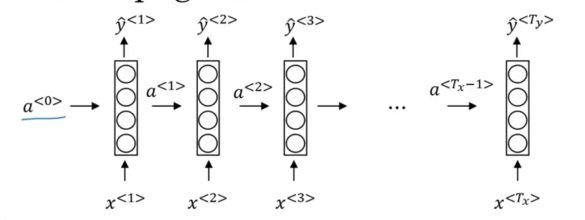


        - 단점
            - 시퀸스 데이터의 다른 값의 정보를 참조받을 때에 오직 왼쪽에서 오른쪽으로 한방향으로만 참조받을수 있음


- ## 다양한 형태의 RNN
    - $T_x, T_y$ 는 시계열 데이터 유형에 따라 일치하지 않을 수 있음
    - $T_x, T_y$ 의 갯수에 따라 일대일, 일대다, 다대일, 다대다 아키텍쳐로 분류할수 있음
        - 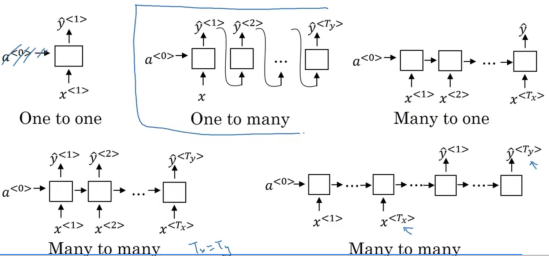
    - $T_x, T_y$ 갯수가 다른 다대다 아키텍쳐인 경우
        - 기계 번역
            - 입력을 이해하는 인코더 부분, 목표에 맞게 변형하는 디코더 부분으로 나누어지게 됨
            - 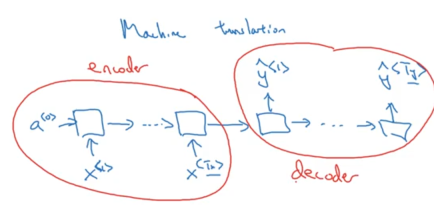

- ## 언어 모델
    - Speech Recognition
        - 임의의 입력에 대해 다음 에 나올 문장이나 단어를 예측하는 모델임
            - $P(y^{\langle 1 \rangle}, y^{\langle 2 \rangle}, \dots, y^{\langle T_y \rangle})$
    - 토큰화
        - 주어진 입력을 토큰 단위(단어 단위) 로 잘라내 가지고 있는 어휘 색인을 참고해 원-핫 벡터로 만듬
        - 토큰화 후 문장의 끝을 나타내는 $\text{<EOS>}$ 추가함
        - 만약 온점을 토큰으로 취급하고싶다면 단어장에 추가하면 됨
        - 단어장에 없는 경우 \<UNK\> 로 설정함
    
    - 모델 구조
        - 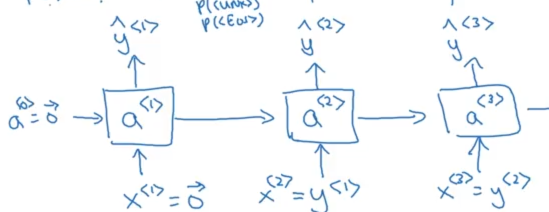
        - RNN 아키텍쳐에 토큰 입력을 $y$ 를 사용한다
        - 토큰 별 손실함수
            - $\mathcal{L}(\hat{y}^{\langle t \rangle}, y^{\langle t \rangle}) = -\sum_{i} y_i^{\langle t \rangle}\log \hat{y}_i^{\langle t \rangle}$
            - 출력이 원 핫 벡터와 동일한 크기이므로 시그마를 사용해 총합을 더해야한다

        - 전체 손실 함수
            - $\mathcal{L} = \sum_{t}\mathcal{L}^{\langle t \rangle}(\hat{y}^{\langle t \rangle}, y^{\langle t \rangle})$

        - 최종 출력
            - $P(y^{\langle 1 \rangle}, y^{\langle 2 \rangle}, y^{\langle 3 \rangle}) = P(y^{\langle 1 \rangle})P(y^{\langle 2 \rangle}|y^{\langle 1 \rangle})P(y^{\langle 3 \rangle}|y^{\langle 1 \rangle},y^{\langle 2 \rangle})$


    - 샘플링
        - 학습된 RNN 모델이 문장을 생성하는 과정임
        - 학습할때는 다음 토큰의 입력값 $x^{<t>}$ 에  $y^{<t-1>}$ 이 들어가지만 샘플링 시에는 $\hat{y}^{<t-1>}$ 를 사용하게 된다
        - 과정
            - 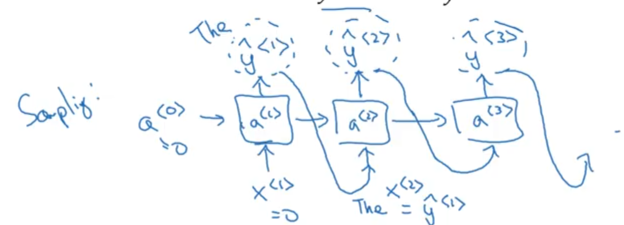
            - 이전 토큰의 예측값 $\hat{y}^{<t-1>}$ 를 다음 토큰 입력에 사용해 연쇄적으로 예측함
            - 최종적으로 토큰의 예측값이 \<EOS\> 가 나올떄까지 반복함
            - 예측값이 \<UNK\> 가 나오는걸 원치 않는다면 \<UNK\> 를 단어장에서 제거하면됨

        - 해당 프로세스를 문자 단위의 예측에도 사용할 수 있음
            - 이 경우 토큰의 단위는 한 문자가 됨
            - \<UNK\> 가 나올 경우를 걱정할 필요가 없다는 장점이 있음
            - 단 계산 비용이 더 비싸고 모델이 매우 길어질 수 있음
            




- ## RNN 기울기 소실 문제
    - RNN 은 깊은 깊이의 연쇄적인 가중치 곱 형태로 이루어져 있으므로, 초기 가중치에 대해 기울기 소실 문제가 발생함
    - 같은 형태로 기울기 폭주도 발생할 가능성 있음
        - 이 때는 Gradient Clipping 사용하면 해결됨

    - 기울기 소실 해결방법은 GRU 와 LSTM 이 있음
    - Gated Recurrent unit(GRU)
        - RNN 형태에서 은닉 층 갱신방식이 달라짐
        - RNN 은 이전 단계 은닉층과 현재 입력값으로 다음 예측치를 출력하고, 은닉층을 전달함
        - 과정
            1. 이전 단계의 은닉층 $a^{<t-1>}$ ($c^{<t-1>}$ 로도 표기함) 과 현재 단계 입력값 $x^{<t>}$ 를 사용해 세 값을 뽑아냄
                - 새로운 은닉층 반영 정도인 업데이트 게이트 $\Gamma_u$
                    - $\Gamma_u = \sigma(W_u[c^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_u)$
                    - 이 값을 사용해 새 정보를 얼마나 반영할지를 정함
                    - 높을 수록 새 정보를 더 많이 반영
                - 기존 은닉층 정보를 얼마나 잊어버릴지 정하는 리셋 게이트 $\Gamma_r$
                    - $\Gamma_r = \sigma(W_r[c^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_r)$
                    - 이 값을 사용해 기존 은닉층 $c^{<t-1>}$ 를 얼마나 초기화할지를 정함
                    - 낮을수록 더 많이 잊어버림
                - 새로운 정보 은닉층 $\tilde{c}^{<t>}$ 
                    - $\tilde{c}^{\langle t \rangle} = \tanh(W_c[\Gamma_r*c^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_c)$
                    - 기존 RNN 수식에서 리셋게이트 $\Gamma_r$ 을 곱한 형태임
                    - 위에서 구한 리셋게이트 $\Gamma_r$ 를 사용해 기존 은닉층 $c^{<t-1>}$ 를 얼마나 덜 반영할지를 정함

            2. 위 두 값 $\Gamma_u, \tilde{c}^{<t>}$ 와 $c^{<t-1>}$ 를 사용해 새 은닉층 $c^{<t>}$ 를 구함
                - $c^{\langle t \rangle} = \Gamma_u * \tilde{c}^{\langle t \rangle} + (1 - \Gamma_u) * c^{\langle t-1 \rangle}$
                    - 기존 은닉층에 새 은닉층 반영정도 $\Gamma_u$ 에 따라 새 정보의 반영 정도가 변함
                        - 높을수록 새 정보 반영도 더 됨
            3. 새로운 은닉층 $c^{<t>}$ 로 다음 토큰 예측치 $\hat{y}^{<t>}$ 를 구하고 다음 GRU 유닛에 전달함
        - 수식 정리

            - $\Gamma_u = \sigma(W_u[c^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_u)$

            - $\Gamma_r = \sigma(W_r[c^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_r)$


            - $\tilde{c}^{\langle t \rangle} = \tanh(W_c[\Gamma_r * c^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_c)$

            - $c^{\langle t \rangle} = \Gamma_u * \tilde{c}^{\langle t \rangle} + (1 - \Gamma_u) * c^{\langle t-1 \rangle}$
        


- ## LSTM
    - GRU 를 더 일반화한 버전임
    - 3개의 게이트를 사용함
        - 기존 정보의 망각 정도를 나타내는 망각 게이트 $\Gamma_f$
        - 새로운 정보의 반영 정도를 나타내는 입력 게이트 $\Gamma_i$
        - 은닉층의 장기기억 정보 중 중요한 정보만 걸러내는 임계값 역할을 하는 출력 게이트 $\Gamma_o$
        - 이 세 게이트 파라미터를 학습시켜 잊을건 잊고 갱신할건 갱신한다음 정보를 반영하는 구조가 완성된다
    - 수식
        - $\tilde{c}^{\langle t \rangle} = \tanh(W_c[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_c)$
            - 기존 RNN 식으로 회귀함

        - $\Gamma_i = \sigma(W_u[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_u)$

        - $\Gamma_f = \sigma(W_f[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_f)$

        - $\Gamma_o = \sigma(W_o[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_o)$

        - $c^{\langle t \rangle} = \Gamma_i * \tilde{c}^{\langle t \rangle} + \Gamma_f * c^{\langle t-1 \rangle}$
            - 망각 게이트가 추가됨
        - $a^{\langle t \rangle} = \Gamma_o * \tanh(c^{\langle t \rangle})$
            - 출력 게이트
        - $c^{<t>}$ 와 $a^{<t>}$ 를 구분지어야 하는것에 주의를 할 것

- ## 양방향 RNN(BRNN)
    - 토큰을 추정 할 때 이전 토큰의 정보뿐만이 아닌 이후 토큰의 정보 또한 참조하기 위해 사용함
    - 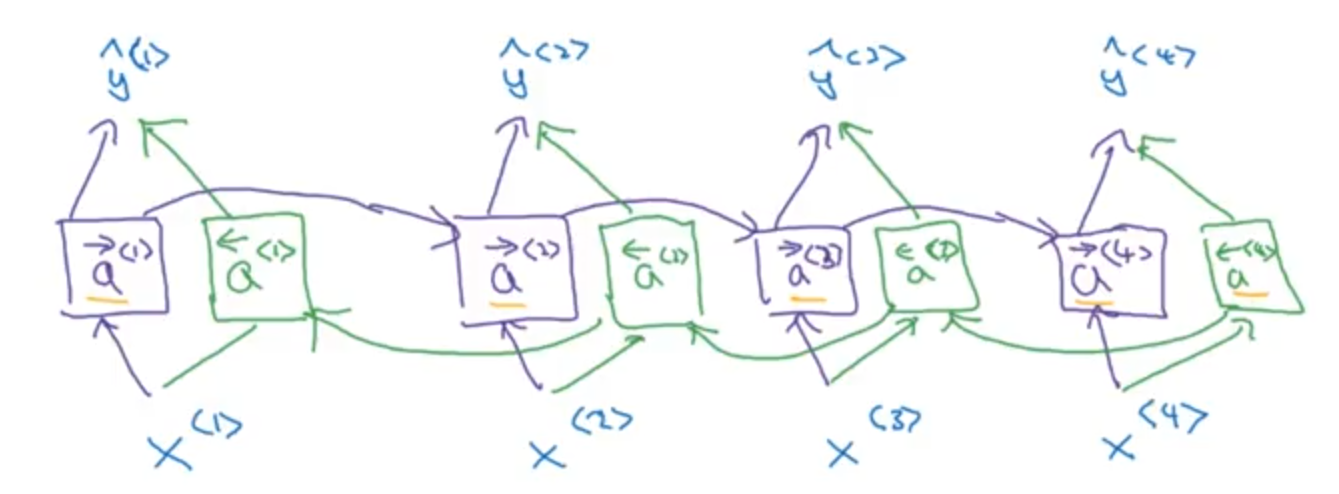
        - 기존 RNN 처럼 순방향 정보를 참조한 Foward RNN, 역방향부터 시작해 반대 방향으로 정보를 참조하는 Backward RNN 를 학습한다
        - 이 두 RNN 블럭을 사용해 예측치 $\hat{y}^{<t>}$ 를 계산한다
            - $\hat{y}^{\langle t \rangle} = g(W_y[\overrightarrow{a}^{\langle t \rangle}, \overleftarrow{a}^{\langle t \rangle}] + b_y)$

    - RNN 블럭 말고도 GRU 나 LSTM 또한 사용가능하다
    - 많은 언어 모델에서 사용된다
    - 예측을 하기 위해선 양방향의 탐색이 전부 끝나야 가능하단 단점이 있다

- ## Deep RNN
    - 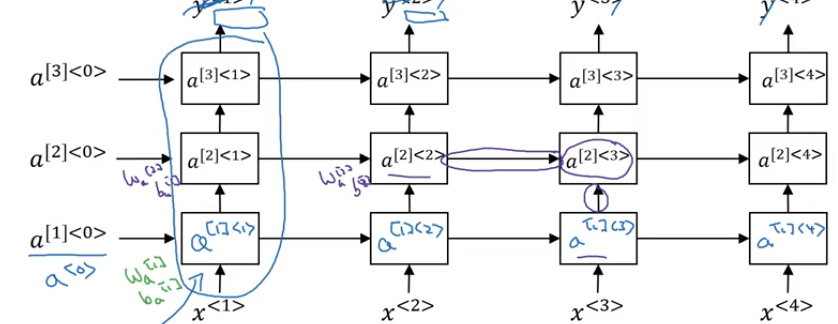
    - RNN 레이어를 3개층을 쌓은 예시임
    - RNN 자체로 연산량이 무겁기 때문에 많은 레이어를 쌓는 경우는 드뭄
    

- ## 단어 임베딩
    - 단어 표현
        - 원핫 벡터 표현 결점
            - 일반화의 어려움
                - 다른 원-핫 벡터와의 내적값이 0이기 떄문에 유사도를 평가하기 어려움

        - Featurized representation
            - 각 단어에 태그를 붙이듯이 특징에 대한 연관도를 수치로 평가해 정의함
            - 비슷한 특징을 가진 데이터를 더 쉽게 일반화할수 있을 것임
            - 각 단어에 대해 이러한 특징을 다차원 벡터에 표현해두는 것을 단어 임베딩이라고 함
            - t-sne 알고리즘

    - 학습 과정
        1. 초대형의 말 뭉치(데이터) 에서 단어 임배딩을 학습시킴
            - 사전학습된 임베딩을 다운받아도 됨
        2. 새로운 작업을 위한 작은 훈련세트에 전이학습시킴
            - 이제 다량의 원-핫 벡터대신 소량의 특징 벡터 사용가능함
        3. 충분한 훈련세트가 있다면 추가적인 학습,파인튜닝하면됨
    - 비슷한 관계의 단어 예측
        - Man → Woman  ⬌  King → ?  
        - $ e_{man} - e_{woman }$
            - 단어 임베딩을 통해 두 단어의 관계를 특징 벡터의 차로 표현할 수 있음
            - 비슷한 관계의 단어들 또한 특징벡터의 차와 비슷한 값을 가지게 됨
            - $e_{king} - e_{queen} \approx e_{man} - e_{woman }$
            - 수식
                - $\underset{w}{\mathrm{arg\,max}}\,\,\text{sim}(e_w, e_{\text{king}} - e_{\text{man}} + e_{\text{woman}})$
                - $\text{sim}$ 함수
                    - Cosine similarity
                        - $\text{sim}(u, v) = \frac{u^T v}{\|u\|_2 \|v\|_2}$
                        - 두 벡터의 내적값임

    - Embedding matrix
        - 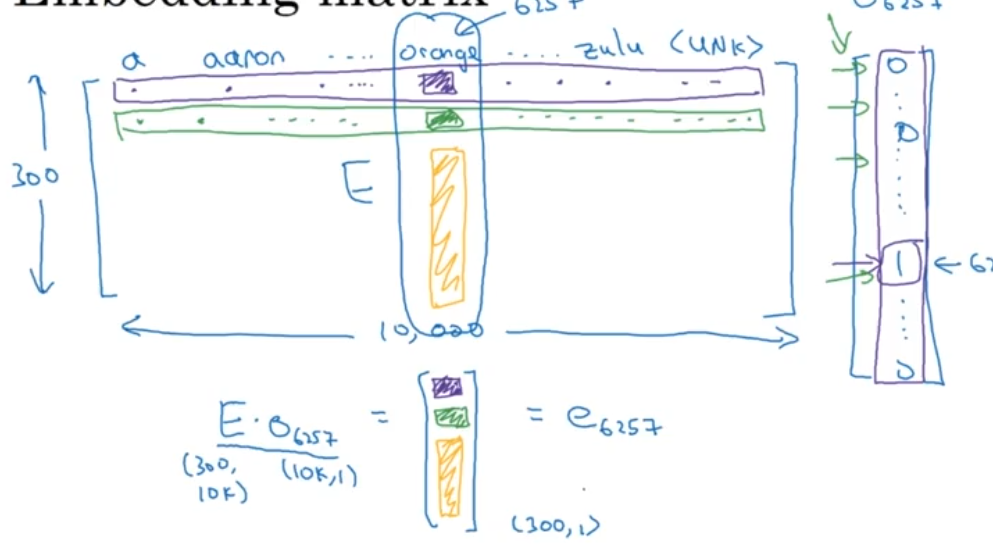
        - 원-핫 벡터 $o_{6257}$로 6257번쨰 원소에 대한 임베딩 값을 단어장에서 추출하는 수식임
        - 단어의 특징 값을 가지고 있는 행렬 $E$ 와 대상 원소 원-핫 벡터 $o_{6257}$ 을 행렬곱하고, 계산결과값 $300 \times 1 $ 크기의 6257번째 원소에 대한 임베딩 값을 $e_{6257}$ 이라고함

- ## Neural language model
    - 초기 알고리즘 과정
        1. 입력 문장을 구성하는 단어들에 대해 단어장 $E$ 와 해당단어 원-핫 벡터와 행렬곱해 $e_n$ 구함
        2. 구한 임베딩 값을 한 층으로 쌓아 전부 신경망에 넣고, 소프트맥스 함수에 집어넣음
            - 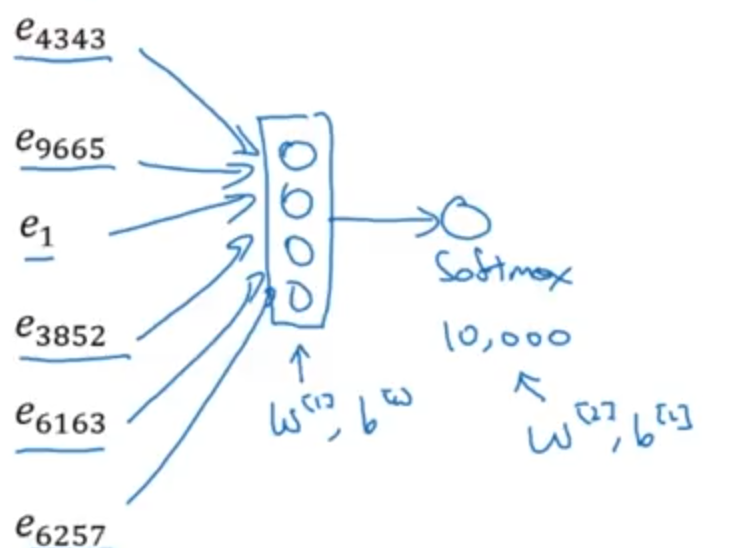
    
    - ### Word2Vec
        - Skip-gram
            - 중심 단어를 지정하고, 이 중심 단어를 기준으로 랜덤한 주변 단어를 지정해 이 주변 단어를 예측하는 문제로 변환하고, 이를 훈련시킴
            - $p(t|c) = \frac{e^{\theta_t^T e_c}}{\sum\limits^{10,000}_{j=1} e^{\theta_j^T e_c}}$

            - $\mathcal{L}(\hat{y}, y) = -\sum\limits^{10,000}_{i=1} y_i \log \hat{y}_i$

            - 느림
            - Hierachical softmax
                - 단어장을 이진 트리 구조로 나눠 대상 단어가 포함되는 트리 경로까지만 연산함
            - 중심 단어 $c$ 의 선정법
                - 반복적으로 등장하지 않는 단어 선정
        - Negative sampling
            - 전체 단어에 대한 원-핫 벡터를 구성하는 것이 아닌,
            - 기존 중심 단어와 주변 단어 (w_center, w_context) 쌍을 정답(1)으로 설정하고,
            - K개의 네거티브 단어를 사전에서 랜덤하게 추출하여 0으로 설정해 부정 샘플로 추가한다.
            - 이렇게 생성된 학습 데이터 $\theta_t$로 단어 임베딩을 학습시킨다.
            - k
                - 작은 데이터셋은 5~20
                - 큰 데이터셋은 2~5
            
            - 과정
                - 행렬곱으로 중심 단어 $w_c$ 임베딩 값 $e_c$ 추출
                - 네거티브 샘플링으로 훈련데이터 $\theta_t$ 생성
                - 기존 단어장 데이터 n 개에 대한 softmax 회귀 대신, 정답 단어와 K 개의 부정 샘플로 이루어진 이진 분류문제 K+1개를 학습시킴
            
            - 샘플링 선택 요령
                - 반복도 높은 단어 선택
                    - 관련도 있는 단어 선택가능성있음
                
                - 완전 랜덤
                    - 단어분포 제대로 표현안됨
                
                - 두 값 적절하게 반영해서 선택함
                    - $\frac{f(w_i)^{\frac{3}{4}}}{\sum\limits_{j=1}^{10,000} f(w_j)^{\frac{3}{4}}}$



- ## GloVe
    - 각 단어가 다른 단어와 함꼐 등장하는 횟수 $X_{ij}$ 를 기반으로 단어 벡터를 학습함
    - $X_{ij}$
        - 단어 i 가 j와 함꼐 등장한 횟수
        - 경사 하강법으로 이 두 단어가 동시 등장 확률을 예측하도록 훈련함

    - 수식
        - $\text{minimize} \sum\limits_{i=1}^{10,000} \sum\limits_{j=1}^{100,000} f(X_{ij}) \left( \theta_i^T e_j + b_i + b_j' - \log X_{ij} \right)^2$
            - $f(X_{ij})$ 는 등장횟수가 없을시 0 으로 초기화돼 해당수식을 배제하고, 등장횟수가 적은 단어에 가중치를 부여해 안정화하는 역할임
            - $ \theta_i^T e_j$ 는 내적 표현
                - 동일한 크기의 행렬 두개 중 하나를 전치곱하여 행렬곱함
            

- ## Sentiment Classification
    - 감정 분석
    - 문장에 감정을 분석하여 긍정적인지 부정적인지 분류하는 문제
    - 데이터 부족 문제 발생가능성 있음

    - 단순 모델 과정
        1. 원-핫 벡터로 이용해 단어장에서 임베딩 벡터 추출
        2. 추출된 모든 벡터에 대해 평균 또는 총합을 구한 다음, 이 벡터를 softmax 분류기를 통과시켜 예측치 $\hat{y}$를 구함
        - 문맥이 고려되지 않기 때문에 비꼬는 문장 같은 경우를 처리하기 어려움
    -  RNN 사용
        1. 임베딩 벡터 추출
        2. 추출된 벡터 RNN 신경망으로 감정분석함
        - RNN 신경망 통해 문맥이 반영되므로 좀더 정교한 분석가능함


- ## Debiasing word embeddings
    - 단어 임베딩은 성별,민족,나이, 성적 성향 같은 편향을 반영할 수 있음

    - 방법
        1. 편향을 정의하고, 편향 축을 찾는다
            - 성별, 나이 ,사회적 지위, etc
        2. 명확하지 않은 단어는 투사시켜 편향을 제거한다
            - 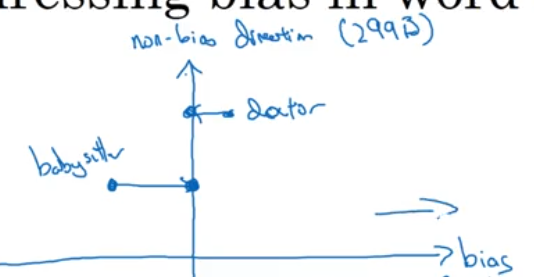
            - 편향을 제거할 단어들을 편향 축과 직교하도록 수정함
        3. 편향적인 단어를 평준화시켜 균형잡힌 상태가 되도록 조정함
            - 단어 뜻에 편향적인 의미가 존재하는 단어는 그 의미를 유지하되,
            - 전체적인 임베딩 값이 특정 방향으로 치우치지 않도록 조정하는것임
            - 편향 축에 대해 동일한 거리를 갖도록 배치한다

    -
    